In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

In [18]:
def power_function(f, a, b, c):
    return a * f**3 + b * f + c

In [19]:
device = "RTX6000Ada"
M = [32, 64, 128, 256, 512, 1024, 2048]
dfs = {}
for m in M:
    file_path = f'../frequency_{device}_gpu_M{m}_tmp.csv'
    with open(file_path, 'r') as f:
        lines = f.readlines()
        lines = [line.strip().split(',') for line in lines]
        lines = [[int(line[7]), float((line[-1].strip()).strip('[]')) / 1000] for line in lines]
        df = pd.DataFrame(lines, columns=['Frequency', 'Power'])
        dfs[m] = df

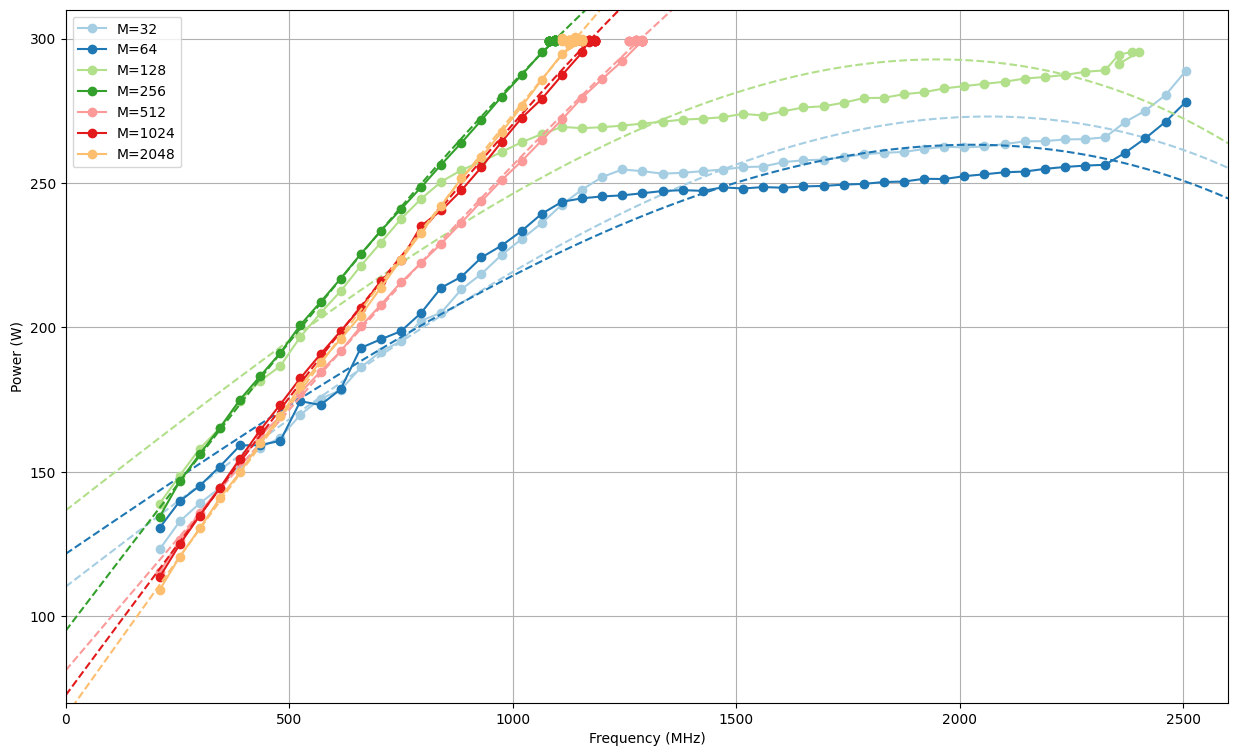

In [20]:
colors = sns.color_palette("Paired", len(dfs))

count = 0
plt.figure(figsize=(15, 9))
for M in dfs:
    df = dfs[M]
    frequency = df['Frequency']
    power = df['Power']
    plt.plot(frequency, power, marker='o', linestyle='-', color=colors[count], label=f'M={M}')
    popt, pcov = curve_fit(power_function, frequency, power)
    a, b, c = popt
    frequency_fit = np.linspace(0, 2600, 100)
    power_fit = power_function(frequency_fit, *popt)
    
    plt.plot(frequency_fit, power_fit, '--', color=colors[count])
    
    count += 1
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (W)')
plt.ylim(70, 310)
plt.xlim(0, 2600)
plt.grid(True)
plt.legend()
plt.show()